<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning%20Interview%20Prep%20Questions/Unsupervised%20Learning%20Algorithms/Clustering%20Algorithms/Gaussian%20Mixture%20Model/gmm_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM) from Scratch (No ML Libraries, No Classes)

In this notebook, we implement **GMM Clustering** from scratch using **NumPy**.

GMM is a flexible probabilistic model that assumes data points are generated from a **mixture of multiple Gaussian distributions**. It uses the **Expectation-Maximization (EM)** algorithm to find the best parameters.

## What is a Gaussian Mixture Model?

A Gaussian Mixture Model assumes the dataset is composed of multiple overlapping **Gaussian (normal) distributions**.

Each cluster is represented by:
- A **mean vector (μ)**
- A **covariance matrix (Σ)**
- A **weight (π)** indicating the proportion of points in that cluster

### GMM uses the EM Algorithm:
1. **E-Step**: Calculate the probability that each point belongs to each Gaussian
2. **M-Step**: Update the mean, covariance, and weights based on these probabilities

Unlike K-Means, GMM supports **soft clustering** (probabilistic assignment).

## Generate Sample Data

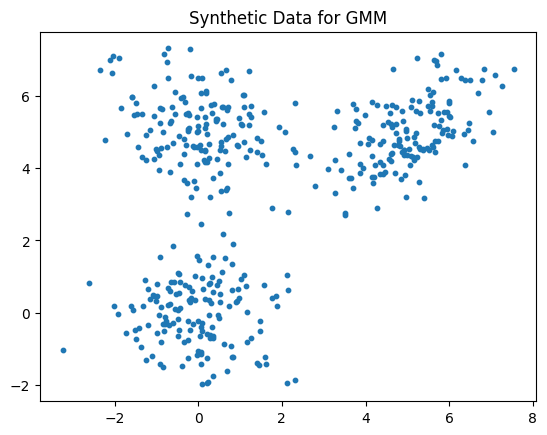

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 150)
X2 = np.random.multivariate_normal([5, 5], [[1, 0.5], [0.5, 1]], 150)
X3 = np.random.multivariate_normal([0, 5], [[1, -0.3], [-0.3, 1]], 150)
X = np.vstack((X1, X2, X3))

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic Data for GMM")
plt.show()

## Helper Functions

In [2]:
def gaussian_pdf(x, mean, cov):
    """Multivariate Gaussian PDF"""
    d = x.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    norm_const = 1 / np.sqrt((2 * np.pi) ** d * cov_det)
    diff = x - mean
    return norm_const * np.exp(-0.5 * diff.T @ cov_inv @ diff)

## GMM via EM (Expectation-Maximization) Algorithm

In [3]:
def gmm(X, k, max_iters=100, tol=1e-4):
    n, d = X.shape
    np.random.seed(0)

    # Initialize parameters
    means = X[np.random.choice(n, k, replace=False)]
    covs = [np.cov(X.T) for _ in range(k)]
    weights = np.ones(k) / k
    resp = np.zeros((n, k))

    for _ in range(max_iters):
        # E-Step: calculate responsibilities
        for i in range(k):
            for j in range(n):
                resp[j, i] = weights[i] * gaussian_pdf(X[j], means[i], covs[i])
        resp = resp / resp.sum(axis=1, keepdims=True)

        # M-Step: update parameters
        Nk = resp.sum(axis=0)
        new_means = np.array([np.sum(resp[:, i].reshape(-1, 1) * X, axis=0) / Nk[i] for i in range(k)])
        new_covs = []
        for i in range(k):
            diff = X - new_means[i]
            weighted_sum = np.zeros((d, d))
            for j in range(n):
                weighted_sum += resp[j, i] * np.outer(diff[j], diff[j])
            new_covs.append(weighted_sum / Nk[i])
        new_weights = Nk / n

        # Check convergence
        if np.linalg.norm(means - new_means) < tol:
            break

        means, covs, weights = new_means, new_covs, new_weights

    labels = np.argmax(resp, axis=1)
    return labels, means, covs


## Run + Visualize

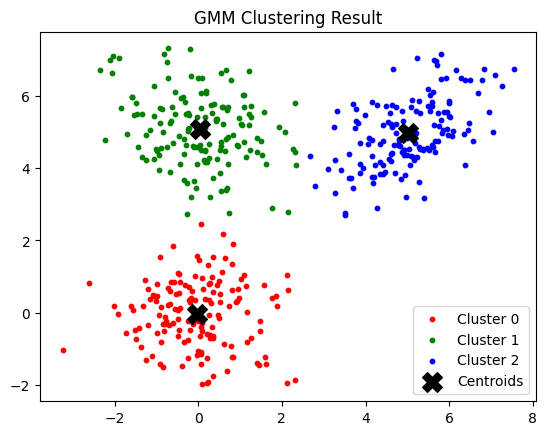

In [4]:
k = 3
labels, means, covs = gmm(X, k)

colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], s=10, color=colors[i], label=f'Cluster {i}')
plt.scatter(means[:, 0], means[:, 1], s=200, color='black', marker='X', label='Centroids')
plt.title("GMM Clustering Result")
plt.legend()
plt.show()

## Summary

- Implemented **Gaussian Mixture Model** clustering using NumPy
- Learned how to use the **Expectation-Maximization** algorithm
- Compared GMM to K-Means (soft clustering, supports covariance)
